In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Initial Admin Inputs

In [2]:
# initial Admin inputs from front-end
# GPU processing required, by default

# model data source - pick one: 1) title, 2) article
# title is about 4x faster, but less accurate
text_source = 'title' # title by default

# number of articles (records) to model with
num_articles = 10000 # default value is 10,000, max for our datasets is 15,000 for now

# maximum batch size, adjusts depending on num_articles
if num_articles <10001:
  max_batch_size = 16
elif num_articles <20001:
  max_batch_size = 8
elif num_articles <40001:
  max_batch_size = 4
else:
  max_batch_size = 1

# Initial Data Load and Processing

In [3]:
import pandas as pd
import numpy as np

In [4]:
# health_tech - latin1 encoded, randomize rows

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/health_tech.csv', encoding="latin1")
df1 = df1.fillna(method="ffill")
df1 = df1.sample(frac=1)

# adding labels - health = 1, tech = 0
df1['label'] = np.where(df1.article_clean.str.contains([tech, technology, robots, computers]), 1, 0)

# pulling out a subset of 10,000 records to model
df1 = df1[0:10000]

# making sure there is a decent number of health articles, verify ~25%
print(df1['label'].sum())

df1.head()

2697


,Unnamed: 0,section_clean,title_clean,article_clean,date,num_words_per_article,label
96558,2190031,tech,tinder breaks into scripted original content,popular dating app tinder has wrapped filming ...,2019-09-16 00:00:00,337,0
106765,2521765,healthcare,germany identifies first case of deadly corona...,jan reuters germany has declared its first con...,2020-01-28 00:00:00,180,1
48354,1001061,health news,steady may win the weight loss race,reuters health dieters who lose varying amount...,2017-08-29,601,1
30030,572720,health,woman feels no pain or anxiety because of gene...,jo cameron feels virtually no pain anxiety or ...,2019-03-29 18:02:00,501,0
100647,2302398,technology news,facebook to expand encryption drive despite wa...,lisbon reuters facebook will outline on wednes...,2019-11-05 00:00:00,441,0


In [5]:
# selecting applicable columns
df1.iloc[:, [1, 2,3,6]].head()

,section_clean,title_clean,article_clean,label
96558,tech,tinder breaks into scripted original content,popular dating app tinder has wrapped filming ...,0
106765,healthcare,germany identifies first case of deadly corona...,jan reuters germany has declared its first con...,1
48354,health news,steady may win the weight loss race,reuters health dieters who lose varying amount...,1
30030,health,woman feels no pain or anxiety because of gene...,jo cameron feels virtually no pain anxiety or ...,0
100647,technology news,facebook to expand encryption drive despite wa...,lisbon reuters facebook will outline on wednes...,0


In [6]:
# corpus_2018_non_health_tech - latin1 encoded, randomize rows

df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/corpus_2018_non_health_tech.csv', encoding="latin1")
df2 = df2.fillna(method="ffill")
df2 = df2.sample(frac=1)

# pulling out a subset of 10,000 records to model
df2 = df2[0:5000]

# adding label - everything here is 2
df2['label'] = 2

df2.head()

,year,month,day,section_clean,title_clean,article_clean,label
5031,2018,9,27,personal finance,wells fargo customer says atm phone scam almos...,cabel sasser narrowly avoided having his bank ...,2
3689,2018,3,3,personal finance,your property taxes just jumped by more than p...,the good news for some homeowners in one town ...,2
1753,2018,5,31,bankruptcy news,uk pensions regulator chief to step down in fe...,may reuters britain pensions watchdog head les...,2
3117,2018,1,4,funds news,private equity firm boosts shale funding in hu...,houston jan reuters luxe energy llc said on th...,2
1003,2018,4,14,finance and economics,how developing countries weave social safety n...,soup kitchens serve the needy for free restaur...,2


In [7]:
# selecting applicable columns
df2.iloc[:, [3,4,5,6]].head()

,section_clean,title_clean,article_clean,label
5031,personal finance,wells fargo customer says atm phone scam almos...,cabel sasser narrowly avoided having his bank ...,2
3689,personal finance,your property taxes just jumped by more than p...,the good news for some homeowners in one town ...,2
1753,bankruptcy news,uk pensions regulator chief to step down in fe...,may reuters britain pensions watchdog head les...,2
3117,funds news,private equity firm boosts shale funding in hu...,houston jan reuters luxe energy llc said on th...,2
1003,finance and economics,how developing countries weave social safety n...,soup kitchens serve the needy for free restaur...,2


In [8]:
# combined

df = pd.concat([df1.iloc[:, [1,2,3,6]], df2.iloc[:, [3,4,5,6]]])
df.shape

(15000, 4)

In [9]:
# see unique section content

df['section_clean'].unique()

array(['tech', 'healthcare', 'health news', 'health', 'technology news',
       'technology  media and telecommunications', 'health care',
       'tech by vice', 'technology', 'health and science',
       'biotech and pharma', 'fintech', 'tech guide', 'biotechnology',
       'science and technology', 'health ', 'health care services',
       'technology executive council',
       'the weekly health quiz marital spats sleep and the worlds ugliest color',
       'tech policy', 'health insurance', 'technology quarterly',
       'wearable tech', 'technology  companies', 'tech transformers',
       'auto tech', 'big tech backlash', 'healthcare facilities',
       'healthy returns', 'impact health', 'mental health',
       'healthy living', 'medical tech',
       'are baby carrots as healthful as other carrots',
       'ask well health benefits of red wine vs grape juice',
       'children s health', 'respiratory health', 'tech trends',
       'consumer technology',
       'health care rulin

**Splitting into Training vs Test datasets**

In [10]:
# randomize rows to prep for dataset split

df = df.sample(frac=1)
df

,section_clean,title_clean,article_clean,label
3772,money,what warren buffett employees should do with m...,warren buffett annual march madness bracket co...,2
104,money,how to start business when you re young and broke,for young people saddled with student loan deb...,2
43031,healthcare,brief pembury lifestyle to acquire property in...,oct reuters pembury lifestyle group unit enter...,0
18075,health,most hormone doctors have no transgender training,if you woke up with throbbing pain in your jaw...,0
66276,health news,new alabama law could shutter two abortion cli...,reuters alabama governor robert bentley signed...,1
...,...,...,...,...
3723,personal finance,senate banking bill would make credit freezes ...,at least one positive thing could come from th...,2
51710,health news,mesoblast stem cell therapy meets goal of pedi...,reuters nearly percent of children with potent...,1
40967,health,smoking causes extensive damage to dna study s...,cnn the vast amount of damage that smoking can...,0
121543,healthcare,qatar offers mln to support gaza strip in coro...,cairo march reuters qatar will provide million...,0


In [11]:
# create initial train and test sets, 70/30 split

training_set = df.sample(frac=0.7) # training set
test_set = df.drop(training_set.index) # test set

training_set.shape, test_set.shape

((10500, 4), (4334, 4))

# Saved Train and Test Data Sets

In [12]:
# keeping here for reference

# saved training_set
path_training_set = '/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_training_set.csv'

with open(path_training_set, 'w', encoding = 'latin1') as f:
  training_set.to_csv(f)

# saved test_set
path_test_set = '/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_test_set.csv'

with open(path_test_set, 'w', encoding = 'latin1') as f:
  test_set.to_csv(f)

**Smaller Sets - Reference**

In [13]:
# block for saving smaller datasets

path_training_mini = '/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_combined_training_set_mini.csv'

training_set.to_csv(path_training_mini, encoding='latin1', header='True', index='False')


path_test_mini = '/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_combined_test_set_mini.csv'

test_set.to_csv(path_test_mini, encoding='latin1', header='True', index='False')

# sanity check
training_set.shape, test_set.shape

((10500, 4), (4334, 4))

**Smaller Set - determined by admin input**

In [14]:
# block for saving smaller datasets

import math

training_upper = math.floor(num_articles * 0.7)
test_upper = num_articles - training_upper

path_training_mini = '/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_combined_training_set_mini.csv'

training_mini = training_set[0:training_upper]
training_mini.to_csv(path_training_mini, encoding='latin1', header='True', index='False')


path_test_mini = '/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_combined_test_set_mini.csv'

test_mini = test_set[0:test_upper]
test_mini.to_csv(path_test_mini, encoding='latin1', header='True', index='False')

training_mini.shape, test_mini.shape

((7000, 4), (3000, 4))

**Reloading Saved Mini Sets**

In [15]:
# Reloading mini data sets for use in model
import numpy as np
import pandas as pd

# training_set_mini
training_mini = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_combined_training_set_mini.csv', encoding="latin1")

# test_set_mini
test_mini = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FourthBrain ML Engineer/4B_GLG/Datasets/NER_data_mini/0_combined_test_set_mini.csv', encoding="latin1")

In [16]:
# sanity check
training_mini.shape, test_mini.shape

((7000, 5), (3000, 5))

# Model using XLNet

In [17]:
# NOTE: this may require restarting the runtime and running everything again a couple of times

# Installing and importing dependencies
!pip install torch
!pip install transformers

#Installing libraries 
import torch
import transformers
from transformers import XLNetTokenizer, XLNetModel, XLNetForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report #, accuracy
from textwrap import wrap
from pylab import rcParams
from torch import optim
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset,RandomSampler,SequentialSampler
import torch.nn.functional as tFn


from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences

from tqdm import tqdm, trange
import io
import matplotlib.pyplot as plt
% matplotlib inline

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# SentencePiece is a prereq for XLNetTokenizer
!pip install sentencepiece

In [20]:
# reference from http://mccormickml.com/2019/09/19/XLNet-fine-tuning/

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

# XLNet Model

In [22]:
df_training = training_mini

In [23]:
# create sentence and label lists
# using selection by admin: title or article
if text_source == 'title':
  sentences = df_training.title_clean.values
else:
  sentences = df_training.article_clean.values

In [24]:
sentences = [sentence + " [SEP] [CLS] " for sentence in sentences]
labels = df_training.label.values

In [25]:
# NOTE: may need to restart the runtime once or twice to get this cell block to work

tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['▁how', '▁high', '▁profile', '▁tragedy', '▁helped', '▁', 'w', 'we', '▁think', '▁differently', '▁about', '▁brain', '▁injuries', '▁[', 's', 'ep', ']', '▁[', 'cl', 's', ']']


In [26]:
# XLNet requires input sentences to be of the same length
# this is managed via use of truncate and pad

# Set the maximum sequence length. 
# title -- using 128 to account for longer titles (up to ~15 words)
# article -- using 384 to take into account first ~50 words in an article 
if text_source == 'title':
  MAX_LEN = 128
else:
  MAX_LEN = 384

# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [27]:
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [28]:
# Use train_test_split to split our data into train and validation sets for training

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [29]:
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [30]:
# Select a batch size for training. 
# For fine-tuning with XLNet, the authors recommend a batch size of 32, 48, or 128.
# Using 16 to avoid memory issues.
# batch_size = 16
batch_size = max_batch_size

# Create an iterator of our data with torch DataLoader. This helps save on memory during training.
# Unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [31]:
# Load XLNEtForSequenceClassification, the pretrained XLNet model with a single linear classification layer on top. 

model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=3)
model.cuda()

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward

In [32]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [33]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(optimizer_grouped_parameters,
                     lr=2e-5)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [34]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [35]:
# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]
    logits = outputs[1]
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      logits = output[0]
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.8086105433061038


Epoch:  33%|███▎      | 1/3 [01:42<03:24, 102.09s/it]

Validation Accuracy: 0.7613636363636364
Train loss: 0.5251141428417966


Epoch:  67%|██████▋   | 2/3 [03:24<01:41, 101.99s/it]

Validation Accuracy: 0.7892992424242423
Train loss: 0.3978333028818145


Epoch: 100%|██████████| 3/3 [05:05<00:00, 101.95s/it]

Validation Accuracy: 0.7973484848484849


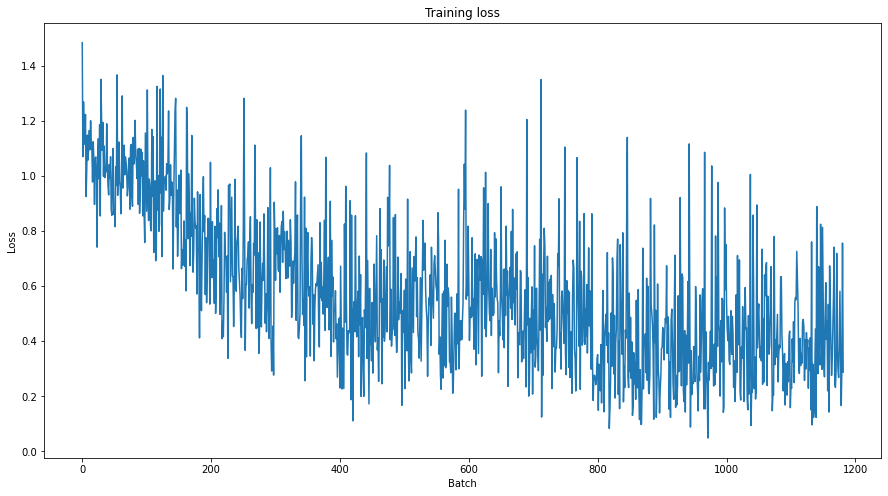

In [36]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [37]:
df_test = test_mini

In [38]:
# Predict and Evaluate on Holdout Set

# Create sentence and label lists
# using selection by admin: title or article
if text_source == 'title':
  sentences = df_test.title_clean.values
else:
  sentences = df_test.article_clean.values

# We need to add special tokens at the beginning and end of each sentence for XLNet to work properly
sentences = [sentence + " [SEP] [CLS]" for sentence in sentences]
labels = df_test.label.values

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]


MAX_LEN = MAX_LEN
# Use the XLNet tokenizer to convert the tokens to their index numbers in the XLNet vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
  
batch_size = 32  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [39]:
# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [40]:
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import matthews_corrcoef
matthews_set = []

for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)

In [41]:
matthews_set

[0.3176494670550632,
 0.714586469999071,
 0.7166172106824926,
 0.635980124757839,
 0.5521343320923863,
 0.6403259122142455,
 0.8577827497631587,
 0.8072289156626506,
 0.7934155258887435,
 0.7966874802786098,
 0.5361151085906434,
 0.41256024204993,
 0.7117770058270332,
 0.615739612318146,
 0.6009397030033613,
 0.6471698729577963,
 0.7772812228449484,
 0.6353864401517942,
 0.6569875592895382,
 0.6429658529522562,
 0.7879666884179949,
 0.7161828908391341,
 0.5443531448612622,
 0.6876595246853978,
 0.6154184735110968,
 0.596815016013111,
 0.6814727874664798,
 0.6567308814893993,
 0.9476130030917334,
 0.7984442360682343,
 0.8527224019507532,
 0.7558048859600113,
 0.5367904846260606,
 0.5146212598591078,
 0.8330417083008015,
 0.539380376032182,
 0.8024691358024691,
 0.7118932790571942,
 0.798970857027806,
 0.6182413279128246,
 0.7167982810298421,
 0.7580338941072389,
 0.7534060332609398,
 0.7563899323262533,
 0.6303319117858115,
 0.8400673400673401,
 0.8637732972899466,
 0.5987460815047022,


In [42]:
# Flatten the predictions and true values for aggregate Matthew's evaluation on the whole dataset
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]


In [43]:
# reference for matthews_corrcoef -- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

matthews_corrcoef(flat_true_labels, flat_predictions)


0.6783870474532531

# Save Model

In [44]:
torch.save(model, 'blah.pkl')

In [45]:
x = torch.load('blah.pkl')
x

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward

In [46]:
pwd

'/content'